# Exploratory Research: Introducing Consumer Stability as an Informing Customer Segmentation Feature 

Notebook associated with the dissertation title above. 

## Data Exploration

Data Exploration to support the business and data understanding relevant to the research.

#### 1. Import python libraries

In [1]:
# relevant library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from pandas.plotting import scatter_matrix
from matplotlib import rc

#### 2. Load & understand available data

In [2]:
# read in csv files to df
product = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/product.csv')
campaign_desc = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/campaign_desc.csv')
campaign_table = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/campaign_table.csv')
causal_data = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/causal_data.csv')
coupon_redempt = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/coupon_redempt.csv')
coupon = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/coupon.csv')
transaction_data = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/transaction_data.csv')
hh_demographic = pd.read_csv('/Users/jonathanlankfer/Documents/dunnhumbyCSV/hh_demographic.csv')

What demographic categories are contained within the source files?

In [3]:
explo_demographic = pd.unique(hh_demographic.values.ravel('k')) # list of unique categorical features contents
explo_demographic

array(['65+', '45-54', '25-34', '35-44', '19-24', '55-64', 'A', 'U', 'B',
       '35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K',
       'Homeowner', 'Unknown', 'Renter', 'Probable Renter',
       'Probable Owner', '2 Adults No Kids', '2 Adults Kids',
       'Single Female', 'Single Male', '1 Adult Kids', '2', '3', '4', '1',
       '5+', 'None/Unknown', '3+', 1, 7, 8, 13, 16, 17, 18, 19, 20, 22,
       25, 27, 31, 39, 40, 42, 43, 46, 48, 49, 52, 55, 56, 57, 58, 67, 71,
       74, 77, 78, 80, 85, 86, 97, 98, 101, 104, 105, 109, 110, 113, 114,
       117, 118, 119, 121, 123, 127, 131, 133, 134, 136, 139, 149, 155,
       157, 158, 159, 161, 164, 165, 166, 170, 178, 184, 192, 193, 198,
       201, 208, 209, 211, 212, 214, 216, 218, 219, 220, 221, 222, 230,
       232, 235, 239, 242, 243, 248, 249, 250, 253, 256, 257, 263, 264,
       276, 281, 282, 283, 289, 290, 294, 300, 301, 302, 304, 306, 309,
  

What Products are being consumed?

In [4]:
product # view of product table

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [5]:
print(product['DEPARTMENT'].unique()) # product department list

['GROCERY' 'MISC. TRANS.' 'PASTRY' 'DRUG GM' 'MEAT-PCKGD' 'SEAFOOD-PCKGD'
 'PRODUCE' 'NUTRITION' 'DELI' 'COSMETICS' 'MEAT' 'FLORAL'
 'TRAVEL & LEISUR' 'SEAFOOD' 'MISC SALES TRAN' 'SALAD BAR' 'KIOSK-GAS'
 'ELECT &PLUMBING' 'GRO BAKERY' 'GM MERCH EXP' 'FROZEN GROCERY'
 'COUP/STR & MFG' 'SPIRITS' 'GARDEN CENTER' 'TOYS' 'CHARITABLE CONT'
 'RESTAURANT' 'RX' 'PROD-WHS SALES' 'MEAT-WHSE' 'DAIRY DELI' 'CHEF SHOPPE'
 'HBC' 'DELI/SNACK BAR' 'PORK' 'AUTOMOTIVE' 'VIDEO RENTAL' ' '
 'CNTRL/STORE SUP' 'HOUSEWARES' 'POSTAL CENTER' 'PHOTO' 'VIDEO'
 'PHARMACY SUPPLY']


In [6]:
print(len((product['SUB_COMMODITY_DESC'].unique()))) # number of sub-departments

2383


Are negative values present within transaction data table?

In [7]:
len(transaction_data.loc[transaction_data['QUANTITY'] <= -1])

0

In [8]:
len(transaction_data.loc[transaction_data['SALES_VALUE'] <= -1])

0

How many days does source file cover?

In [9]:
day_period = (transaction_data['DAY'].max())-(transaction_data['DAY'].min())
day_period

710

Which products are most popular?

In [10]:
product_transaction = product.merge(transaction_data, on='PRODUCT_ID', how='inner') 
# merge product & transaction table to have basket attributes alongside transaction
product_transaction # view of merged table

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,1228,29046618323,157,1,3.49,3313,0.0,2213,23,0.00,0.00
1,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,358,30707611686,247,1,3.49,3266,0.0,1211,36,0.00,0.00
2,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,325,33046710871,410,4,13.96,3191,0.0,1139,59,0.00,0.00
3,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,1675,30760265177,250,1,0.99,3235,0.0,936,36,0.00,0.00
4,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,,1032,33783848749,458,1,1.59,33904,0.0,2034,66,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,,1947,42276190904,710,1,7.19,32004,0.0,1239,102,0.00,0.00
2595728,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,,2022,42172795382,702,1,7.19,438,0.0,1044,101,0.00,0.00
2595729,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,,2070,42263426957,709,1,4.79,311,0.0,1832,102,0.00,0.00
2595730,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,,2112,42289735750,711,1,7.19,321,0.0,1034,102,0.00,0.00


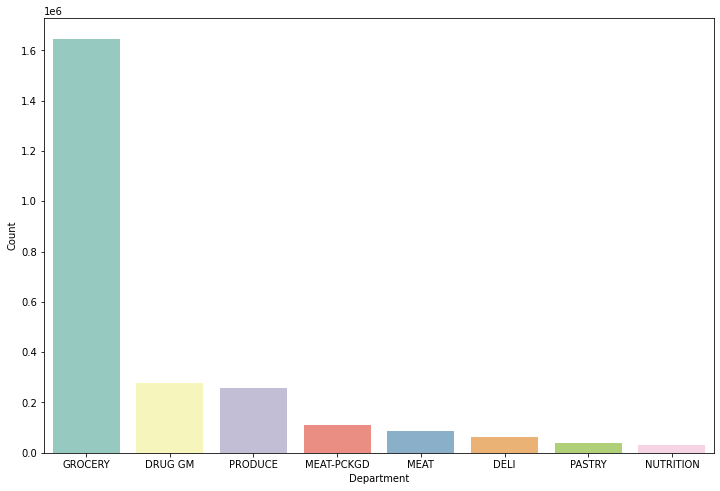

In [11]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set plot
ax = sns.countplot(x="DEPARTMENT", palette="Set3", data=product_transaction, 
                   order=pd.value_counts(product_transaction['DEPARTMENT']).iloc[:8].index)

# set title, legends and labels and xticks
plt.ylabel('Count')
plt.xlabel('Department')

# show plot
plt.show()

- 2,383 sub-departments of products
- Groceries dominate purchasing, followed by pharmaceutical and produce

In [12]:
transaction_data # view of transaction table

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0


How many transactions were completed in in data set?

In [13]:
len(transaction_data)

2595732

In [14]:
transaction2 = transaction_data.groupby(['household_key']).sum() 
# group tansaction data by household, summing features
transaction2.describe().round(decimals=2)

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.500000e+03,2500.00,2.500000e+03,2500.00,2500.00,2.500000e+03,2500.00,2500.00,2500.00,2500.00,2500.00
mean,3.532916e+13,403642.79,3.002156e+09,104274.25,3222.99,3.263015e+06,-559.33,1621383.64,58374.38,-17.04,-3.03
std,3.404679e+13,397549.58,3.041478e+09,244456.08,3349.03,1.108591e+07,565.71,1555239.02,57465.75,41.40,9.31
min,1.124262e+11,345.00,4.018684e+06,5.00,8.17,1.520000e+03,-4668.59,7700.00,55.00,-509.83,-126.00
25%,1.099327e+13,118572.00,8.537949e+08,770.00,970.74,1.725670e+05,-756.62,498509.50,17099.00,-14.20,-1.60
50%,2.485575e+13,276185.00,2.030195e+09,11084.50,2157.75,4.593265e+05,-388.54,1153434.50,40057.50,-3.60,-0.25
75%,4.932549e+13,571525.75,4.120051e+09,87640.00,4413.32,1.334811e+06,-165.08,2275095.50,82742.00,0.00,0.00
max,2.269272e+14,2740218.00,2.273309e+10,4479917.00,38319.79,1.851068e+08,-0.25,12106724.00,396704.00,0.00,0.00


- 2,500 households in data set
- average spend per household of £3222.99
- average quantity purchased per household of 104,274.25 units
- large disparity between mean and 50% and very high variance suggesting outlying data

In [15]:
transaction3 = transaction_data.groupby(['household_key']).mean() 
# group tansaction data by household, averaging features
transaction3.describe().round(decimals=2)

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.500000e+03,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,3.389159e+10,379.68,2844162.60,92.08,3.14,2905.99,-0.56,1569.90,54.93,-0.01,-0.00
std,1.950422e+09,83.11,574524.25,242.58,0.99,6345.17,0.28,184.87,11.87,0.03,0.01
min,2.746886e+10,41.14,980734.71,0.88,1.15,28.07,-4.75,567.08,6.71,-0.42,-0.10
25%,3.278571e+10,336.52,2475208.38,1.31,2.58,356.13,-0.64,1462.16,48.74,-0.01,-0.00
50%,3.392993e+10,385.54,2800737.99,14.95,3.01,418.46,-0.50,1585.35,55.81,-0.00,-0.00
75%,3.490619e+10,427.00,3170670.66,115.58,3.51,1382.95,-0.41,1695.79,61.73,0.00,0.00
max,4.194579e+10,685.45,6703550.88,6393.96,17.73,34007.00,-0.04,2129.56,98.64,0.00,0.00


- 2,500 households in data
- average spend £3.14 per household per transaction
- average quantity purchased of 92.08 units per transaction
- large disparity between mean and 50% & high variance suggesting outlying data

Why is there a high quantity variance within transaction data?

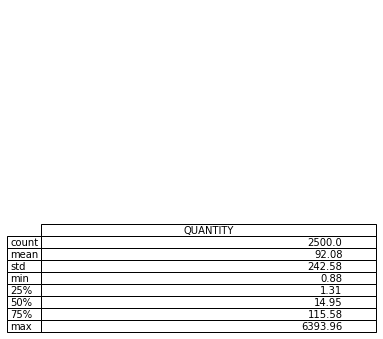

In [16]:
# prepare plot
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, transaction3[['QUANTITY']].describe().round(decimals=2))

# show splot
plt.show()

How does consumption behaviour set against demographic information?

In [17]:
household_transaction = hh_demographic.merge(transaction2, on='household_key', how='inner')
# merging household with transaction data to analyse demographic information against consumption behaviour
household_transaction # view created data table

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,59011300789841,680479,5274477372,1997,4330.16,1031657,-697.04,2405318,98412,-80.56,-26.15
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,46407491805304,603059,4673722721,1554,3400.05,458196,-482.51,2151100,87061,-30.40,-5.15
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,69077418481266,837564,6558479072,68333,5534.97,1260561,-1078.30,3266335,121046,-28.35,-1.85
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,81169701279284,965457,8166423384,1863829,13190.92,758404,-1627.19,3738794,139626,-308.37,-77.75
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,16101582732506,140483,2102474564,81200,1512.02,1642204,-171.29,696104,20367,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494,21810997172968,278247,2001195622,57875,2120.93,4695901,-441.98,1030444,40127,-19.39,-0.90
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496,51049749332385,603915,4370564947,130304,4339.66,550969,-1115.09,2113107,87071,-51.60,-12.40
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497,66099712248967,750309,4613968170,61236,7111.98,53868247,-1341.03,2895978,108628,-16.84,-0.75
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498,29792538323975,372335,2880739025,31339,2601.60,568095,-279.40,1443766,53791,0.00,0.00


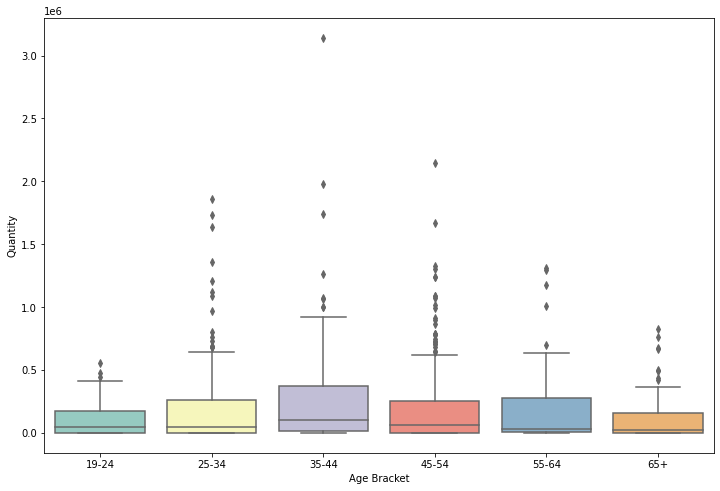

In [18]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with ordered age brackets
sns.boxplot(x="AGE_DESC", y="QUANTITY", data=household_transaction,
            palette="Set3",
            order=['19-24','25-34','35-44','45-54','55-64','65+'])

# set title
plt.xlabel('Age Bracket')
plt.ylabel('Quantity')

# show plot
plt.show()

- clear outlying data outside IQR of each age bracket
- 35-44 bracket highest spread of quantity purchased
- 19-25 & 65+ lowest quantities purchased

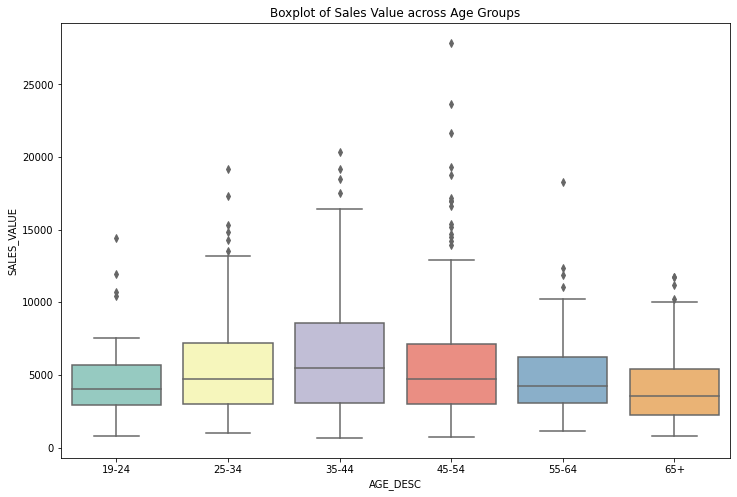

In [19]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with the ordered continents
sns.boxplot(x="AGE_DESC", y="SALES_VALUE", data=household_transaction,
            palette="Set3",
            order=['19-24','25-34','35-44','45-54','55-64','65+'])

# set title and save figure
plt.title("Boxplot of Sales Value across Age Groups")

# show plot
plt.show()

- sales also demonstrating high variance with large outlying values
- 35-44 age bracket highest spender
- 19-25 & 65+ lowest spenders

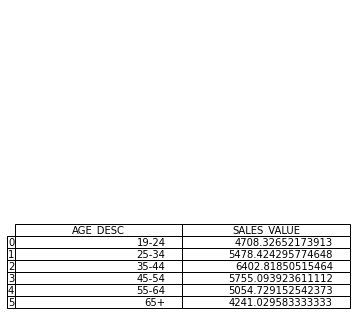

In [20]:
# prepare table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# set plot
table(ax, household_transaction.groupby('AGE_DESC', as_index=False)['SALES_VALUE'].mean())

# show plot
plt.show()

Does household size influence over sales per age bracket?

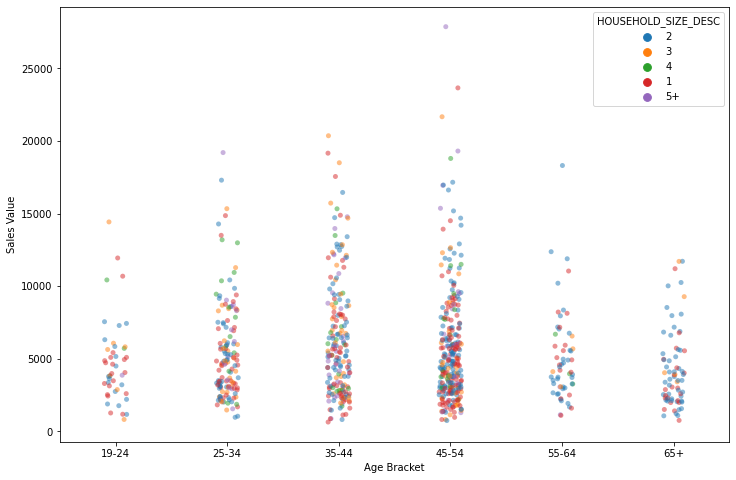

In [21]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set plot
bplot=sns.stripplot(y='SALES_VALUE', x='AGE_DESC', data=household_transaction, 
                   jitter=True, marker='o', alpha=0.5,
                   hue='HOUSEHOLD_SIZE_DESC',size=5,order=['19-24','25-34','35-44','45-54','55-64','65+'])

# set title
plt.xlabel('Age Bracket')
plt.ylabel('Sales Value')

# show plot
plt.show()

- lack of observable patterns across household sizes

## Data Preparation

#### 1. data cleansing

Removing outlying quantity values:

In [22]:
refined_transaction = transaction_data.copy(transaction_data.drop
                                            (transaction_data[transaction_data['QUANTITY'] >= 208].index, 
                                             inplace = True))
len(refined_transaction)

2572601

- 23,131 transactions removed from data set

Confirming refined quantity column:

In [23]:
refined_transaction['QUANTITY'].max()

190

How does this alteration effect transaction data?

In [24]:
grouped_refinedtrans_mean = refined_transaction.groupby(['household_key']).mean() 
# group tansaction data by household exluding outlyiers, averaging features

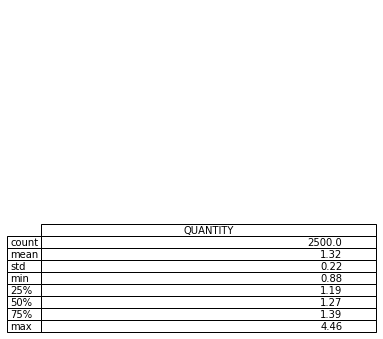

In [25]:
# prepare plot
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, grouped_refinedtrans_mean[['QUANTITY']].describe().round(decimals=2))

# show splot
plt.show()

In [26]:
grouped_refinedtrans_sum = refined_transaction.groupby(['household_key']).sum() 
# group tansaction data by household exluding outlyiers, summing features

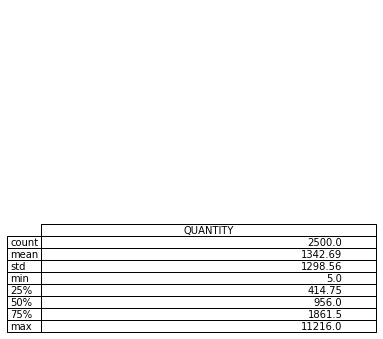

In [27]:
# prepare plot
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, grouped_refinedtrans_sum[['QUANTITY']].describe().round(decimals=2))

# show plot
plt.show()

evaluating and removing skew:

In [28]:
transaction_data.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


# Static RFM Analysis

Dummy analysis used within methodology section of dissertation as visualisation tool to deomstrate concepts and theories.

RFM Feature generation:

In [29]:
transaction_data.drop(transaction_data[transaction_data['QUANTITY'] >= 208].index, inplace = True)
# remove outlying quantity values

In [30]:
household_transaction = transaction_data.groupby(['household_key']).sum()

In [31]:
household_transaction.describe()

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,3.501336e+13,3.999820e+05,2.942660e+09,1342.693600,2981.259960,3.245854e+06,-551.230412,1.607802e+06,57844.762800,-17.044616,-3.030324
std,3.368619e+13,3.932504e+05,2.970316e+09,1298.561015,2997.963311,1.106330e+07,554.583699,1.540114e+06,56844.244174,41.401314,9.311947
min,1.124262e+11,3.450000e+02,4.018684e+06,5.000000,8.170000,1.520000e+03,-4664.550000,7.700000e+03,55.000000,-509.830000,-126.000000
25%,1.092523e+13,1.175215e+05,8.324290e+08,414.750000,921.712500,1.698572e+05,-742.222500,4.960532e+05,17032.000000,-14.205000,-1.600000
50%,2.471586e+13,2.741325e+05,2.007166e+09,956.000000,2055.110000,4.565295e+05,-384.895000,1.144128e+06,39669.000000,-3.595000,-0.250000
75%,4.893605e+13,5.679615e+05,4.036682e+09,1861.500000,4058.482500,1.323166e+06,-164.580000,2.254284e+06,82103.500000,0.000000,0.000000
max,2.266898e+14,2.737278e+06,2.268736e+10,11216.000000,26984.950000,1.851040e+08,-0.250000,1.210672e+07,396279.000000,0.000000,0.000000


In [32]:
# Monetary Value Feature
monetary_household = household_transaction.loc[:, ['QUANTITY', 'SALES_VALUE']]
monetary_household["Monetary Value"] = monetary_household["QUANTITY"].astype('float') * monetary_household["SALES_VALUE"].astype('float')
monetary = monetary_household[['Monetary Value']]
monetary

,Monetary Value
household_key,
1,8647329.52
2,1629919.56
3,4189421.20
4,458442.02
5,190869.70
...,...
2496,7643521.10
2497,20812743.00
2498,2417907.20


- Monetary value defined as household total spend value mutliplied by quantity

In [33]:
# Frequency Value Feature
frequency_household = transaction_data.groupby(by='household_key', as_index=True).agg({'DAY': pd.Series.nunique})
frequency = frequency_household.rename({'DAY': 'Frequency'}, axis='columns')
frequency

,Frequency
household_key,
1,79
2,45
3,45
4,30
5,33
...,...
2496,44
2497,190
2498,148


- Frequency value defined as number of days a household visisted retailor and purchased atleast 1 unit
- Involvement narrowed by counting by day for consistency and remove deviation by unusual behaviour 

In [34]:
# Recency Value Feature
last_day = transaction_data['DAY'].max()
recency_household = transaction_data.groupby(by='household_key', as_index=True).agg({'DAY': lambda x: (last_day-x.max())})
recency = recency_household.rename({'DAY': 'Recency'}, axis='columns')
recency

,Recency
household_key,
1,5
2,43
3,8
4,84
5,8
...,...
2496,28
2497,11
2498,1


- Recency value defined as number of days since last visit

In [35]:
# Merging RFM feature tables together
FM_table = pd.merge(recency, frequency, on='household_key')
RFM_table = pd.merge(FM_table, monetary, on='household_key')
RFM_table

,Recency,Frequency,Monetary Value
household_key,,,
1,5,79,8647329.52
2,43,45,1629919.56
3,8,45,4189421.20
4,84,30,458442.02
5,8,33,190869.70
...,...,...,...
2496,28,44,7643521.10
2497,11,190,20812743.00
2498,1,148,2417907.20


Further data exploration via statistical segmenting:

In [36]:
quantiles = RFM_table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [37]:
segmented_rfm = RFM_table.copy()

In [38]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [39]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary Value'].apply(FMScore, args=('Monetary Value',quantiles))
segmented_rfm.head()

,Recency,Frequency,Monetary Value,R_quartile,F_quartile,M_quartile
household_key,,,,,,
1,5,79,8647329.52,2,2,1
2,43,45,1629919.56,4,3,3
3,8,45,4189421.20,3,3,2
4,84,30,458442.02,4,4,3
5,8,33,190869.70,3,4,4


In [40]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head()

,Recency,Frequency,Monetary Value,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
household_key,,,,,,,,
1,5,79,8647329.52,2,2,1,221,5
2,43,45,1629919.56,4,3,3,433,10
3,8,45,4189421.20,3,3,2,332,8
4,84,30,458442.02,4,4,3,443,11
5,8,33,190869.70,3,4,4,344,11


Pre-processing: Log transformation and standardisation steps 

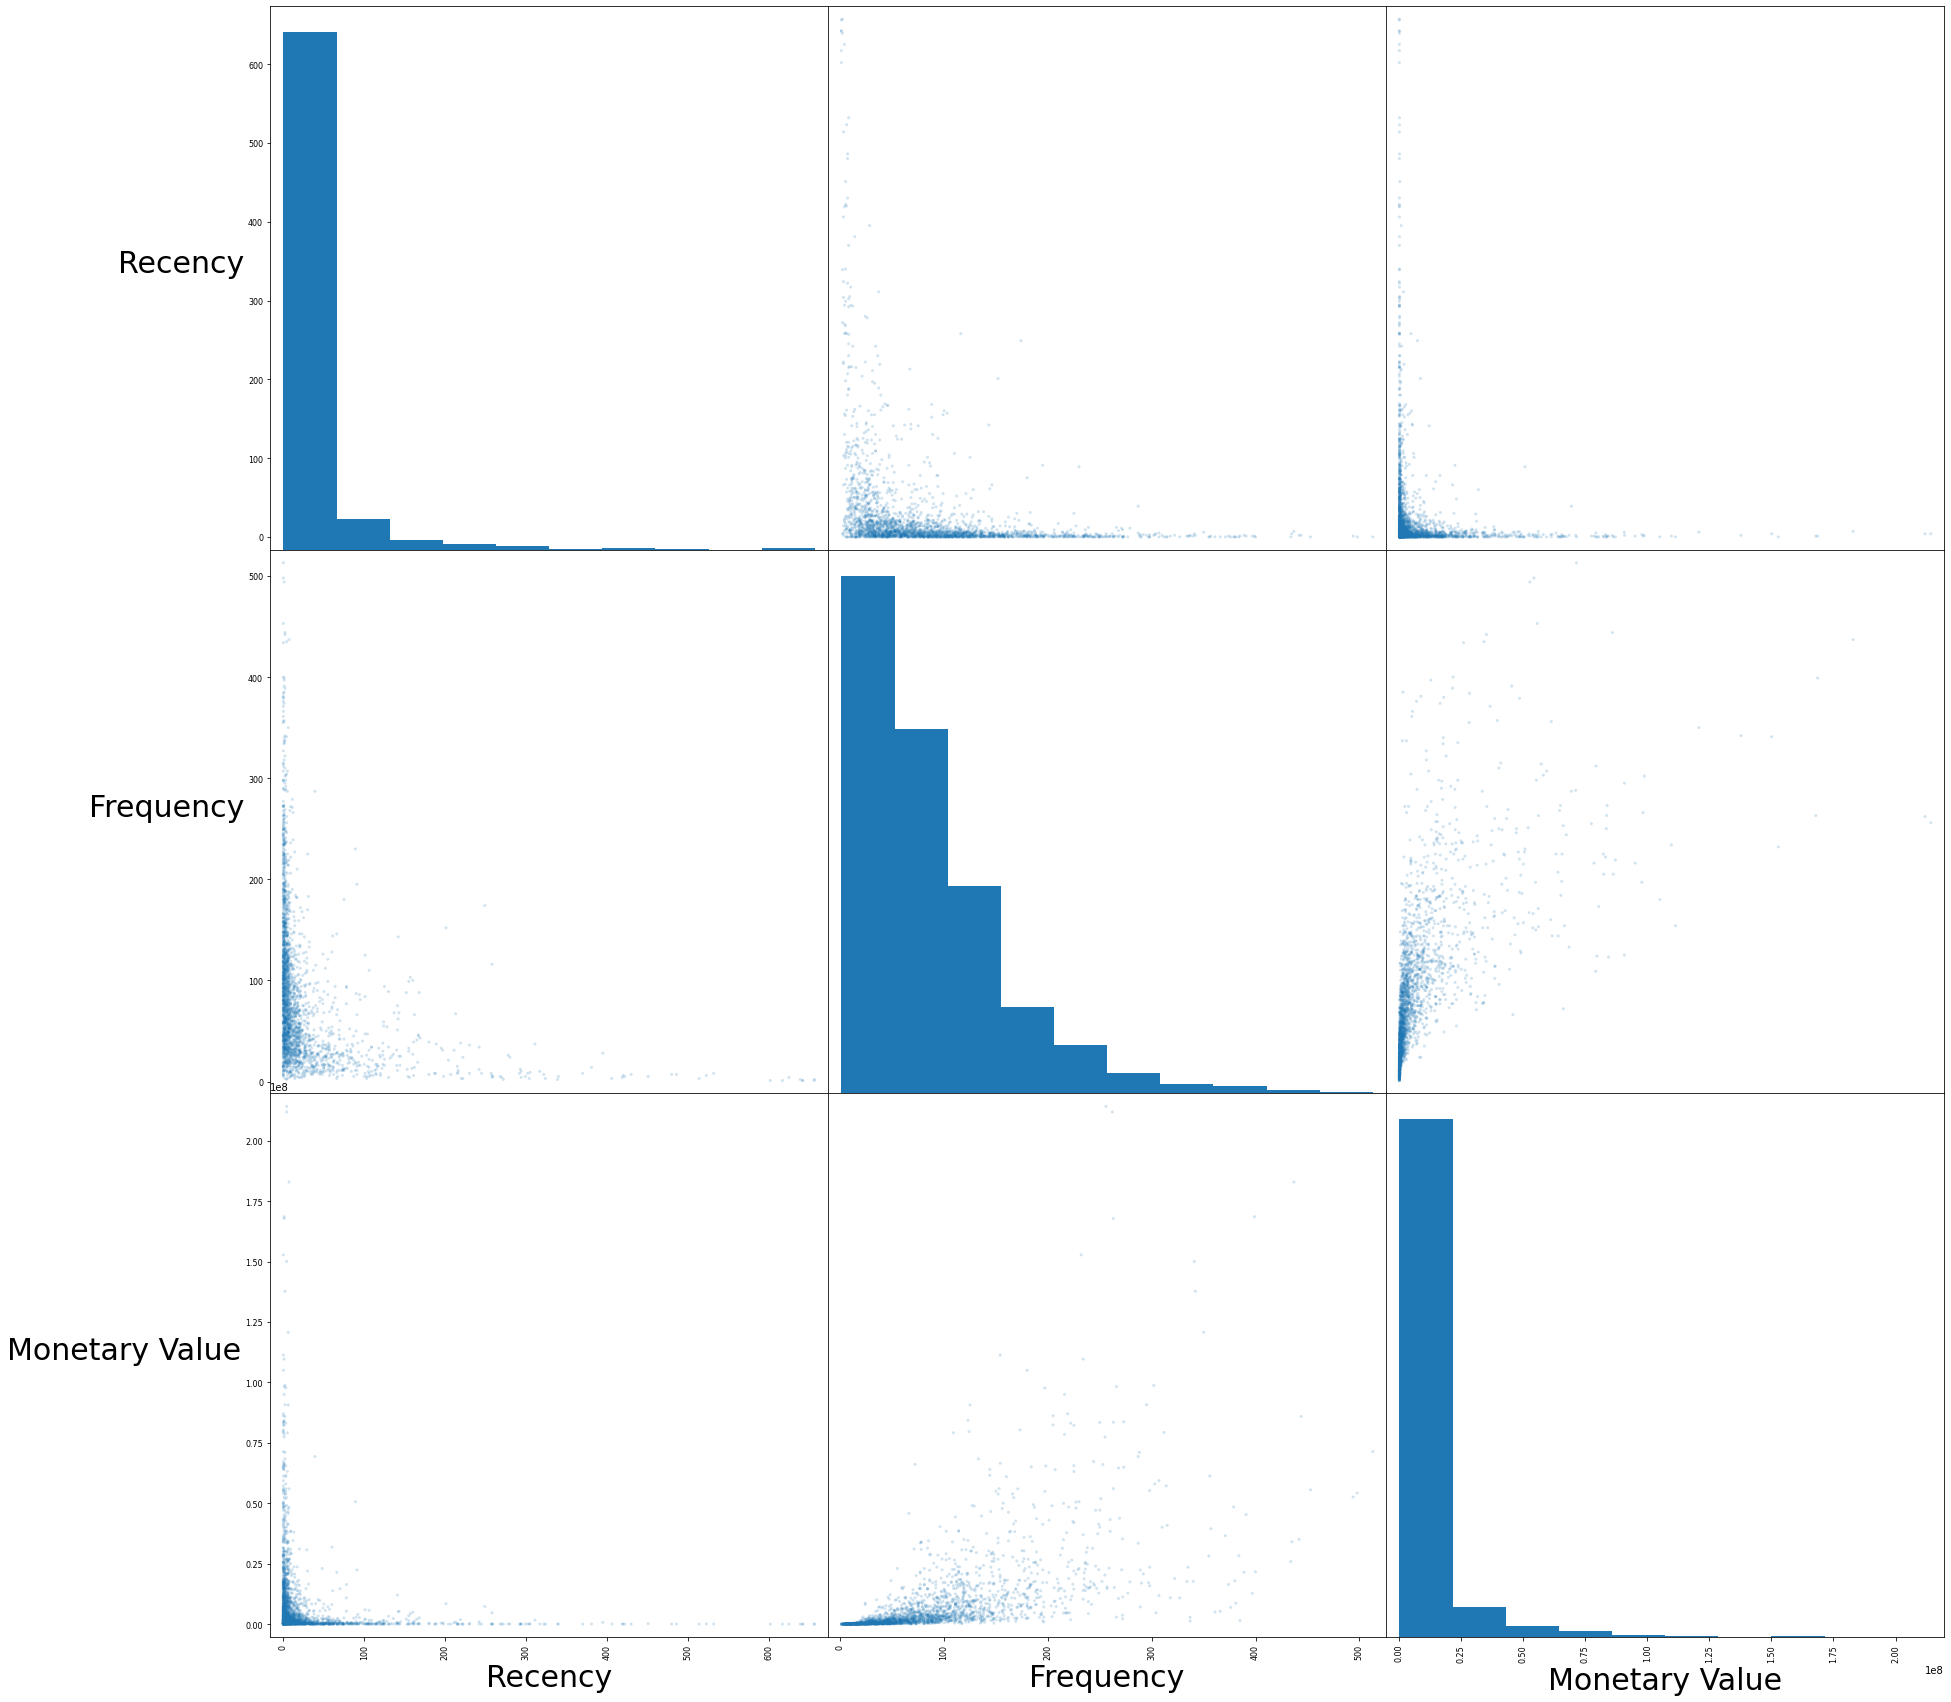

In [41]:
# set plot
axes = pd.plotting.scatter_matrix(RFM_table, figsize = (30,30), alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_size(30)
    ax.yaxis.label.set_ha('right')

Text(0.5, 69.0, 'RFM measures correlations')

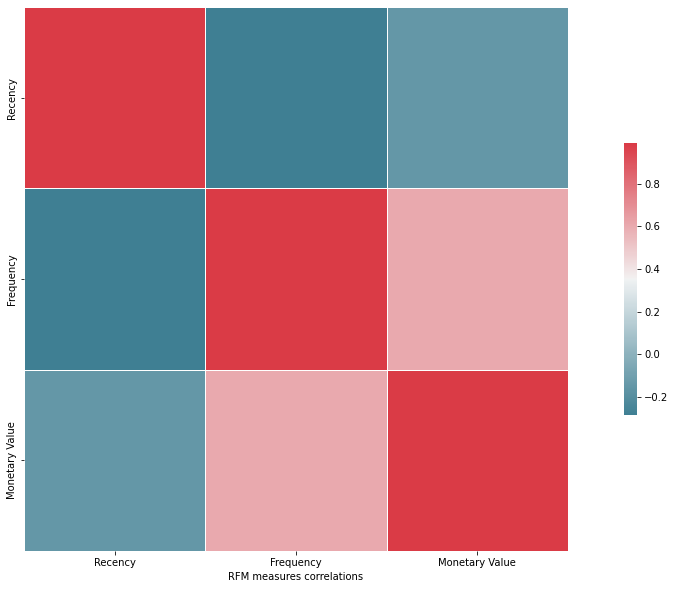

In [42]:
corr = RFM_table.corr()
#-- Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,10))

#-- Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xlabel('RFM measures correlations')

In [43]:
logged_RFM_table = np.log(RFM_table).copy() # log data in order to normalise 
logged_RFM_table.replace([np.inf, -np.inf], np.nan, inplace=True) # replace infinite values (log of 0 = infinity) with NaN to be able to include all instances within analysis

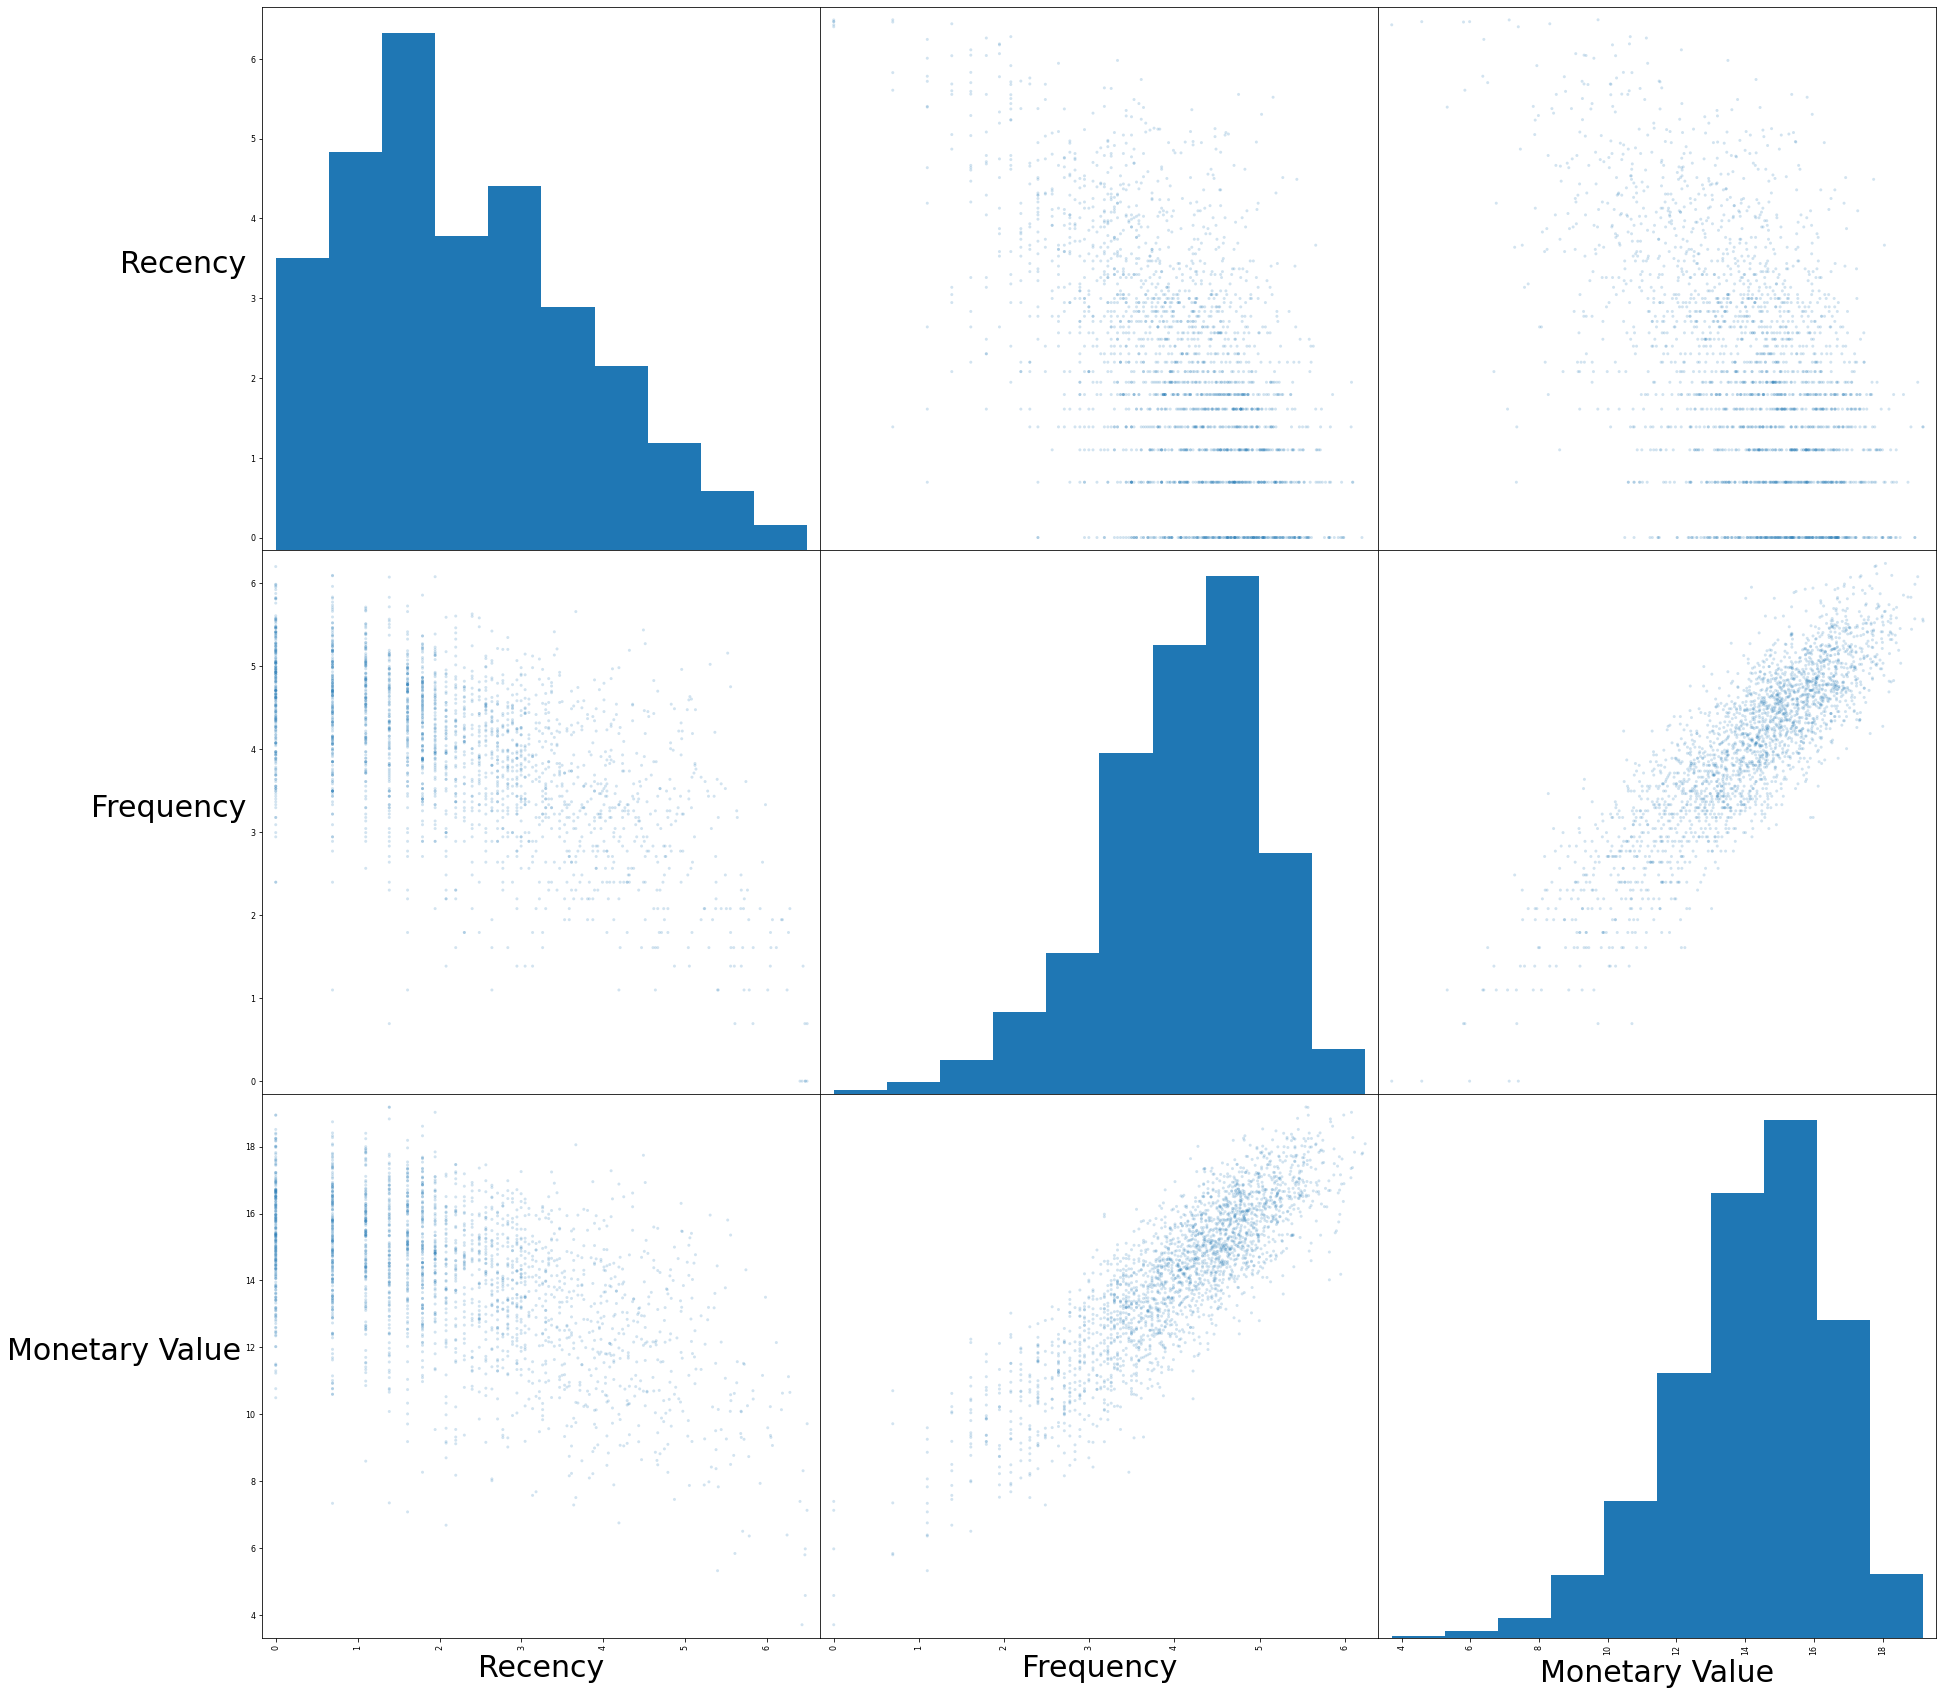

In [44]:
# scatter matrix with logged data (distributed centrally)
axes = pd.plotting.scatter_matrix(logged_RFM_table, figsize = (30,30), alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_size(30)
    ax.yaxis.label.set_ha('right')

In [45]:
logged_RFM_table.head(5) # view transformation on data values

,Recency,Frequency,Monetary Value
household_key,,,
1,1.609438,4.369448,15.972761
2,3.761200,3.806662,14.304041
3,2.079442,3.806662,15.248073
4,4.430817,3.401197,13.035589
5,2.079442,3.496508,12.159346


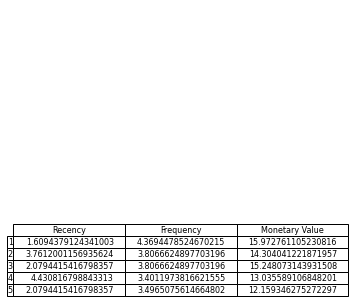

In [46]:
# prepare plot
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, logged_RFM_table.head(5),rowLabels='Household_key' )

# show plot
plt.show()

Defining a standardisation function:

In [47]:
# mean and standard deviation calculation, using iloc to apply based on feature 

recency_mean = logged_RFM_table.iloc[ : ,[0]].stack().mean() 
recency_std = logged_RFM_table.iloc[ :,[0]].stack().std()

frequency_mean = logged_RFM_table.iloc[ : ,[1]].stack().mean()
frequency_std = logged_RFM_table.iloc[ : ,[1]].stack().std()

monetary_mean = logged_RFM_table.iloc[ : ,[2]].stack().mean()
monetary_std = logged_RFM_table.iloc[ : ,[2]].stack().std()

In [48]:
# standardisation function - takes a value within dataset, and returns standardised value
def standardise(dataset):
  dataset.iloc[:, [0]] = (dataset.iloc[:, [0]] - recency_mean)/recency_std
  dataset.iloc[:, [1]] = (dataset.iloc[:, [1]] - frequency_mean)/frequency_std
  dataset.iloc[:, [2]] = (dataset.iloc[:, [2]] - monetary_mean)/monetary_std


  return(dataset) 

In [49]:
scaled_RFM = standardise(logged_RFM_table).copy() # apply standardisation function on static RFM data set

scaled_RFM.head(5) # view standardised values

,Recency,Frequency,Monetary Value
household_key,,,
1,-0.429287,0.307519,0.790042
2,1.023079,-0.278502,0.054976
3,-0.112051,-0.278502,0.470819
4,1.475047,-0.700708,-0.503774
5,-0.112051,-0.601463,-0.889757


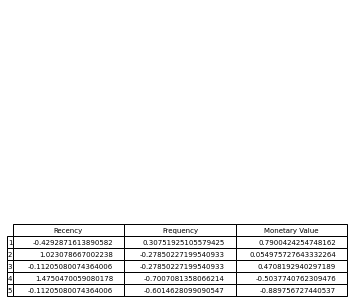

In [50]:
# prepare plot
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, logged_RFM_table.head(5),rowLabels='Household_key' )

# show plot
plt.show()

array([[<AxesSubplot:xlabel='Recency', ylabel='Recency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Recency'>,
        <AxesSubplot:xlabel='Monetary Value', ylabel='Recency'>],
       [<AxesSubplot:xlabel='Recency', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Frequency'>,
        <AxesSubplot:xlabel='Monetary Value', ylabel='Frequency'>],
       [<AxesSubplot:xlabel='Recency', ylabel='Monetary Value'>,
        <AxesSubplot:xlabel='Frequency', ylabel='Monetary Value'>,
        <AxesSubplot:xlabel='Monetary Value', ylabel='Monetary Value'>]],
      dtype=object)

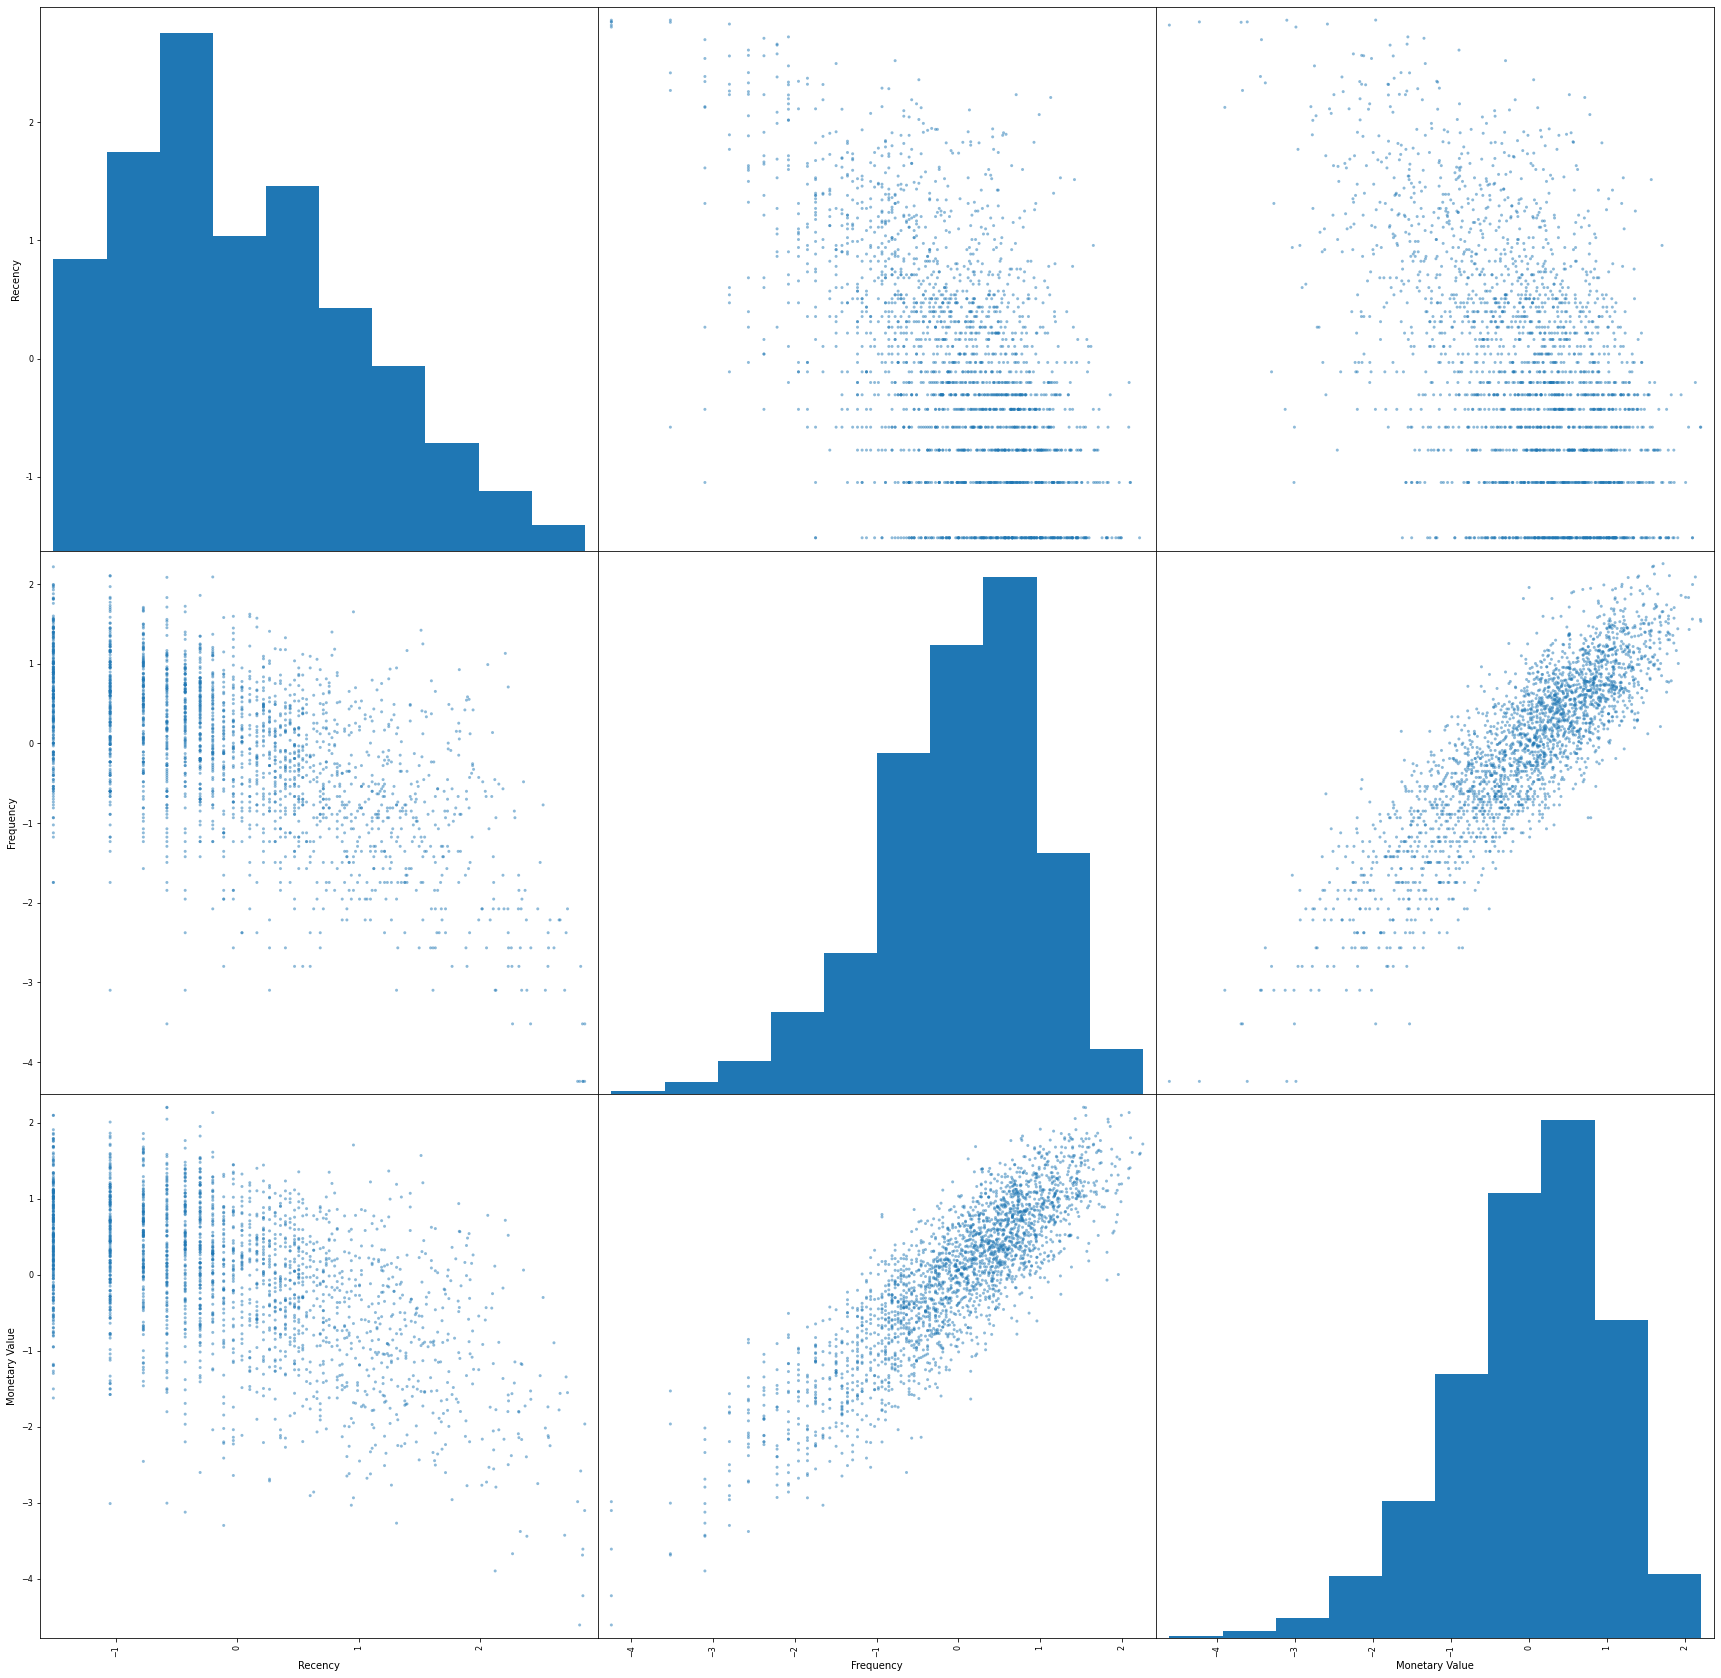

In [51]:
# scatter matrix with logged and standardised data (distributed centrally)

pd.plotting.scatter_matrix(scaled_RFM,figsize=(30,30))
        

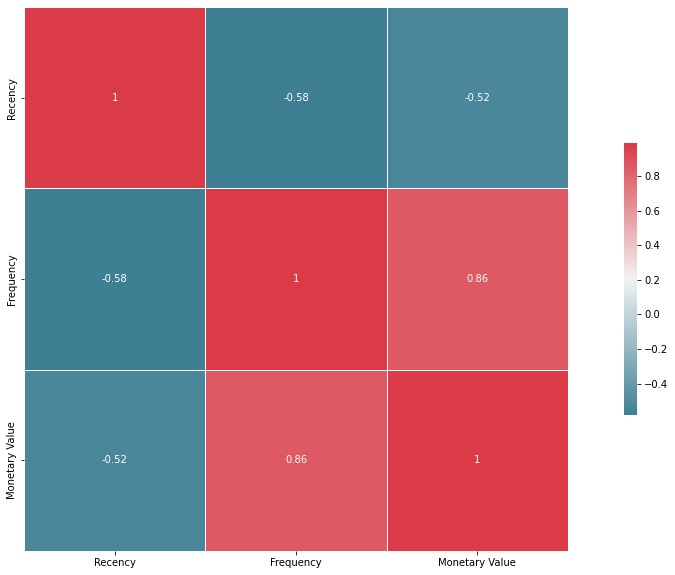

In [52]:
# prepare plot
f, ax = plt.subplots(figsize=(20,10))

# set plot
corr = scaled_RFM.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# show plot
plt.show()

# Lagged RFM Anaylsis

This section of the notebook contains the code relevant to the dissertation's research focus.

#### 1. Feature engineering

In [53]:
# Generating temporal values via lagged quantity and sales values within 7 day windows

refined_transaction["quantity_l1"] = refined_transaction.QUANTITY.where(
    (refined_transaction.DAY >= 703), "0")
refined_transaction["quantity_l2"] = refined_transaction.QUANTITY.where(
    (refined_transaction.DAY >= 696) & (transaction_data.DAY<703), "0")
refined_transaction["quantity_l3"] = refined_transaction.QUANTITY.where(
    (refined_transaction.DAY >= 689) & (transaction_data.DAY<696), "0")

refined_transaction["sales_value_l1"] = refined_transaction.SALES_VALUE.where(
    (refined_transaction.DAY >= 703), "0")
refined_transaction["sales_value_l2"] = refined_transaction.SALES_VALUE.where(
    (refined_transaction.DAY >= 696) & (transaction_data.DAY<703), "0")
refined_transaction["sales_value_l3"] = refined_transaction.SALES_VALUE.where(
    (refined_transaction.DAY >= 689) & (transaction_data.DAY<696), "0")

refined_transaction.loc[:, ['household_key','quantity_l1','quantity_l2','quantity_l3','sales_value_l1','sales_value_l2','sales_value_l3']]

,household_key,quantity_l1,quantity_l2,quantity_l3,sales_value_l1,sales_value_l2,sales_value_l3
0,2375,0,0,0,0,0,0
1,2375,0,0,0,0,0,0
2,2375,0,0,0,0,0,0
3,2375,0,0,0,0,0,0
4,2375,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2595727,1598,1,0,0,0.99,0,0
2595728,1598,1,0,0,8.89,0,0
2595729,1598,1,0,0,6.99,0,0
2595730,1598,1,0,0,4.5,0,0


Recency temporal feature:

In [54]:
recency_lagged = refined_transaction.copy()

recency_lagged['recency_l1'] = np.where(recency_lagged['DAY']>=703,1,0) 
recency_lagged['recency_l2'] = np.where((recency_lagged['DAY']>=696) & (recency_lagged['DAY'] < 703),1,0) 
recency_lagged['recency_l3'] = np.where((recency_lagged['DAY']>=689) & (recency_lagged['DAY'] < 696), 1,0) 

recency_lagged_final = recency_lagged.loc[:, ['household_key','recency_l1','recency_l2','recency_l3']].groupby('household_key').sum()

#adding static recency value from dummy rfm table
merged_recency_lagged = pd.merge(recency_lagged_final, recency, on='household_key')

merged_recency_lagged

,recency_l1,recency_l2,recency_l3,Recency
household_key,,,,
1,30,24,39,5
2,0,0,0,43
3,20,0,0,8
4,0,0,0,84
5,1,0,2,8
...,...,...,...,...
2496,0,0,0,28
2497,0,16,6,11
2498,13,0,1,1


- lagged recency value defined as 1 if household purchased within window, else 0
- summed to represent how consistently household purchasing occurs within a period (high value = many recent transactions)

Monetary temporal feature:

In [55]:
monetary_lagged = refined_transaction.loc[:,['household_key','QUANTITY','DAY', 'SALES_VALUE','quantity_l1','quantity_l2','quantity_l3','sales_value_l1','sales_value_l2','sales_value_l3']]

monetary_lagged["monetary_static"] = monetary_lagged["QUANTITY"].astype('float') * monetary_lagged["SALES_VALUE"].astype('float')
monetary_lagged["monetary_l1"] = monetary_lagged["quantity_l1"].astype('float') * monetary_lagged["sales_value_l1"].astype('float')
monetary_lagged["monetary_l2"] = monetary_lagged["quantity_l2"].astype('float') * monetary_lagged["sales_value_l2"].astype('float')
monetary_lagged["monetary_l3"] = monetary_lagged["quantity_l3"].astype('float') * monetary_lagged["sales_value_l3"].astype('float')

monetary_lagged.loc[:, ['household_key','monetary_static','monetary_l1','monetary_l2','monetary_l3']].groupby('household_key').sum()

,monetary_static,monetary_l1,monetary_l2,monetary_l3
household_key,,,,
1,5368.86,93.05,64.31,159.43
2,2362.64,0.00,0.00,0.00
3,5564.94,39.99,0.00,0.00
4,1747.05,0.00,0.00,0.00
5,859.05,12.99,0.00,16.98
...,...,...,...,...
2496,6175.09,0.00,0.00,0.00
2497,11676.12,0.00,133.44,125.31
2498,3119.90,49.17,0.00,4.99


- monetary lagged value defined as total monetary spend per window

In [56]:
# merge monetary and recency tables
recency_monetary_lagged = pd.merge(merged_recency_lagged, monetary_lagged, on='household_key').loc[:,['household_key','Recency','recency_l1','recency_l2','recency_l3','monetary_static','monetary_l1','monetary_l2','monetary_l3']]

recency_monetary_lagged.rename(columns={'Recency': 'recency_static'}, inplace=True)

recency_monetary_lagged.groupby('household_key',as_index=False).sum()

,household_key,recency_static,recency_l1,recency_l2,recency_l3,monetary_static,monetary_l1,monetary_l2,monetary_l3
0,1,8635,51810,41448,67353,5368.86,93.05,64.31,159.43
1,2,30702,0,0,0,2362.64,0.00,0.00,0.00
2,3,7368,18420,0,0,5564.94,39.99,0.00,0.00
3,4,25284,0,0,0,1747.05,0.00,0.00,0.00
4,5,1776,222,0,444,859.05,12.99,0.00,16.98
...,...,...,...,...,...,...,...,...,...
2495,2496,41300,0,0,0,6175.09,0.00,0.00,0.00
2496,2497,21527,0,31312,11742,11676.12,0.00,133.44,125.31
2497,2498,856,11128,0,856,3119.90,49.17,0.00,4.99
2498,2499,2314,128427,0,5785,4129.38,423.38,0.00,11.87


Frequency lagged feature:

In [57]:
frequency_lagged = refined_transaction.copy()

frequency_lagged['frequency_l1'] = frequency_lagged['DAY'].apply(lambda x: 1 if x >= 703 else 0)
frequency_lagged['frequency_l2'] = frequency_lagged['DAY'].apply(lambda x: 1 if x >= 696 and x<703 else 0)
frequency_lagged['frequency_l3'] = frequency_lagged['DAY'].apply(lambda x: 1 if x >= 689 and x<696 else 0)

frequency_lagged.groupby('household_key',as_index=False).sum().loc[:, ['household_key','frequency_l1','frequency_l2','frequency_l3']]

,household_key,frequency_l1,frequency_l2,frequency_l3
0,1,30,24,39
1,2,0,0,0
2,3,20,0,0
3,4,0,0,0
4,5,1,0,2
...,...,...,...,...
2495,2496,0,0,0
2496,2497,0,16,6
2497,2498,13,0,1
2498,2499,111,0,5


- Temporal frequency value defined as number of transactions household completed per window

In [58]:
#adding static frequency value from dummy rfm table
merged_frequency_lagged = pd.merge(frequency_lagged, frequency,on='household_key')

merged_frequency_lagged.groupby('household_key',as_index=False).sum().loc[:,['household_key','Frequency','frequency_l1','frequency_l2','frequency_l3']]
merged_frequency_lagged.rename(columns={'Frequency': 'frequency_static', }, inplace=True)

frequency_final = merged_frequency_lagged.groupby('household_key',as_index=False).sum().loc[:,['household_key','frequency_static','frequency_l1','frequency_l2','frequency_l3']]
frequency_final


,household_key,frequency_static,frequency_l1,frequency_l2,frequency_l3
0,1,136433,30,24,39
1,2,32130,0,0,0
2,3,41445,20,0,0
3,4,9030,0,0,0
4,5,7326,1,0,2
...,...,...,...,...,...
2495,2496,64900,0,0,0
2496,2497,371830,0,16,6
2497,2498,126688,13,0,1
2498,2499,83304,111,0,5


In [82]:
# producing final temporal RFM data frame

RFM_lagged = pd.merge(recency_monetary_lagged, frequency_final, on='household_key').loc[:, ['household_key','recency_static','recency_l1','recency_l2','recency_l3','monetary_static','monetary_l1','monetary_l2','monetary_l3','frequency_static','frequency_l1','frequency_l2','frequency_l3']]

RFM_lagged = RFM_lagged.groupby('household_key',as_index=True).sum()

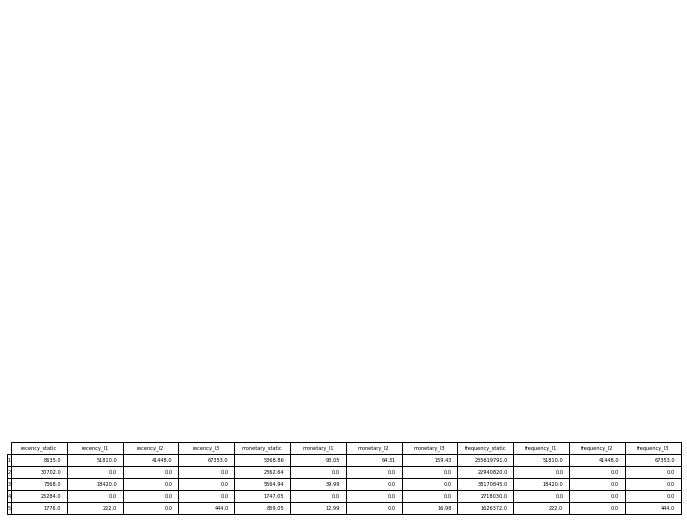

In [60]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis

# set plot
table(ax, RFM_lagged.head(5),rowLabels='Household_key' )

# show plot
plt.show()

#### 2. Data pre-processing

Log transformation on lagged data:

In [61]:
logged_RFM_lagged = np.log(RFM_lagged).copy() # log data in order to normalise 
logged_RFM_lagged.replace([np.inf, -np.inf], np.nan, inplace=True) # replace infinite values (log of 0 = infinity) with NaN to be able to include all instances within analysis

In [62]:
logged_RFM_lagged

,recency_static,recency_l1,recency_l2,recency_l3,monetary_static,monetary_l1,monetary_l2,monetary_l3,frequency_static,frequency_l1,frequency_l2,frequency_l3
household_key,,,,,,,,,,,,
1,9.063579,10.855338,10.632195,11.117703,8.588371,4.533137,4.163715,5.071605,19.277730,10.855338,10.632195,11.117703
2,10.332083,NaN,NaN,NaN,7.767535,NaN,NaN,NaN,16.948428,NaN,NaN,NaN
3,8.904902,9.821192,NaN,NaN,8.624241,3.688629,NaN,NaN,17.457583,9.821192,NaN,NaN
4,10.137927,NaN,NaN,NaN,7.465684,NaN,NaN,NaN,14.815418,NaN,NaN,NaN
5,7.482119,5.402677,NaN,6.095825,6.755827,2.564180,NaN,2.832036,14.301862,5.402677,NaN,6.095825
...,...,...,...,...,...,...,...,...,...,...,...,...
2496,10.628618,NaN,NaN,NaN,8.728279,NaN,NaN,NaN,18.377016,NaN,NaN,NaN
2497,9.977063,NaN,10.351757,9.370927,9.365301,NaN,4.893652,4.830791,20.405360,NaN,10.351757,9.370927
2498,6.752270,9.317220,NaN,6.752270,8.045556,3.895284,NaN,1.607436,18.501753,9.317220,NaN,6.752270


Standardise logged lagged data:

In [63]:
# mean and standard deviation calculation, using iloc to apply based on feature 

recency_lag_mean = logged_RFM_lagged.iloc[ : ,0:3].stack().mean() 
recency_lag_std = logged_RFM_lagged.iloc[ :,0:3].stack().std()

monetary_lag_mean = logged_RFM_lagged.iloc[ : ,4:7].stack().mean()
monetary_lag_std = logged_RFM_lagged.iloc[ : ,4:7].stack().std()

frequency_lag_mean = logged_RFM_lagged.iloc[ : ,8:11].stack().mean()
frequency_lag_std = logged_RFM_lagged.iloc[ : ,8:11].stack().std()

In [64]:
# standardisation function - takes a value within dataset, and returns 
# standardised value
def standardise(dataset):
  dataset.iloc[:, 0:3] = (dataset.iloc[:, 0:3] - recency_lag_mean)/recency_lag_std
  dataset.iloc[:, 4:7] = (dataset.iloc[:, 4:7] - monetary_lag_mean)/monetary_lag_std
  dataset.iloc[:, 8:11] = (dataset.iloc[:, 8:11] - frequency_lag_mean)/frequency_lag_std


  return(dataset) 

In [65]:
scaled_RFM_lagged = standardise(logged_RFM_lagged).copy() # apply standardisation function on lagged RFM data set
scaled_RFM_lagged = scaled_RFM_lagged.replace(np.nan, 0)

In [96]:
scaled_RFM_lagged.describe()

,recency_static,recency_l1,recency_l2,recency_l3,monetary_static,monetary_l1,monetary_l2,monetary_l3,frequency_static,frequency_l1,frequency_l2,frequency_l3
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,-0.279805,0.151839,0.127966,5.150124,0.884396,-0.458133,-0.426263,2.184315,0.858145,-0.459539,-0.398606,5.150124
std,0.748959,0.841886,0.743031,4.927634,0.516908,0.564196,0.566665,2.215038,0.704780,0.496885,0.480316,4.927634
min,-3.298950,-3.560750,-3.537814,0.000000,-1.641880,-2.808991,-2.595120,-1.203973,-2.307732,-2.199184,-2.190746,0.000000
25%,-0.752943,0.000000,0.000000,0.000000,0.590785,-0.804568,-0.783982,0.000000,0.453449,-0.833902,-0.751601,0.000000
50%,-0.142781,0.000000,0.000000,6.893594,0.951476,-0.231045,0.000000,1.999451,0.958429,-0.358482,-0.037810,6.893594
75%,0.121014,0.541934,0.386283,9.885387,1.244200,0.000000,0.000000,4.334443,1.378715,0.000000,0.000000,9.885387
max,2.167016,2.805022,2.508661,13.899819,2.302046,0.491073,0.690322,7.400614,2.359973,0.142698,0.033671,13.899819


#### 3. Correlation Analysis

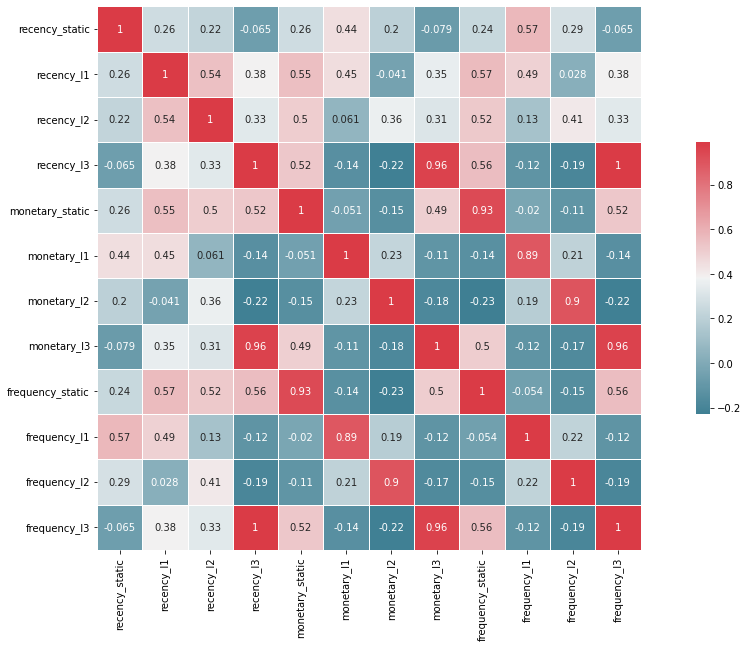

In [66]:
# prepare plot
f, ax = plt.subplots(figsize=(20,10))

# set plot
corr = scaled_RFM_lagged.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# show plot
plt.show()

In [67]:
refined_scaled_RFM_lagged = scaled_RFM_lagged.drop(['frequency_static','frequency_l1','frequency_l2','frequency_l3','recency_l3'], axis=1)

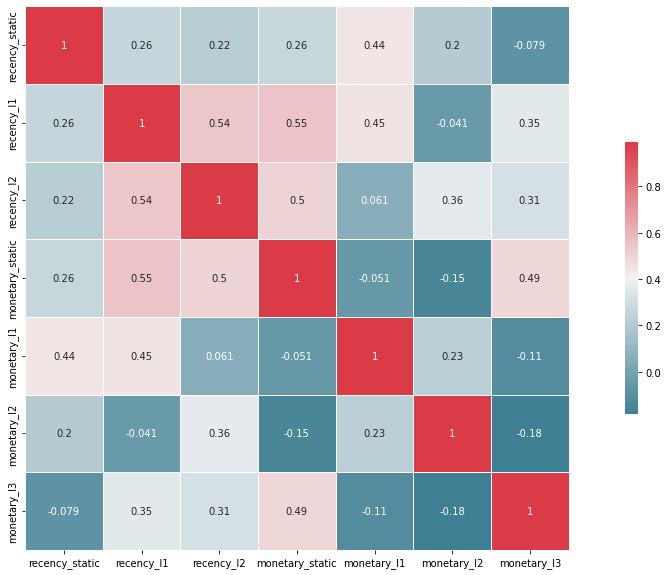

In [68]:
# prepare plot
f, ax = plt.subplots(figsize=(20,10))

# set plot
corr = refined_scaled_RFM_lagged.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# show plot
plt.show()

#### 4. PCA

In [69]:
%matplotlib inline

pca = PCA(n_components=6) # set dimensions to number of features to gain broad sense of contribution
pca.fit(refined_scaled_RFM_lagged) # fit to existing data shape

print(refined_scaled_RFM_lagged.columns) # list features for reference
print(pca.explained_variance_ratio_.round(decimals=3)) # extent original features contribute to newly derived factors by taking cumulative variance

Index(['recency_static', 'recency_l1', 'recency_l2', 'monetary_static',
       'monetary_l1', 'monetary_l2', 'monetary_l3'],
      dtype='object')
[0.677 0.147 0.06  0.055 0.039 0.013]


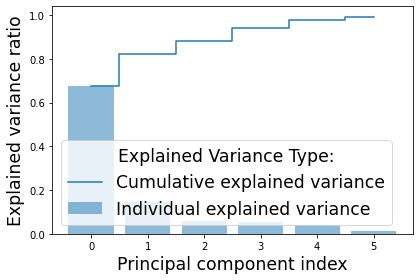

In [70]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize='xx-large')
plt.xlabel('Principal component index', fontsize='xx-large')
plt.legend(loc='best', fontsize='xx-large',title='Explained Variance Type:',title_fontsize='xx-large')
plt.tight_layout()
plt.show()

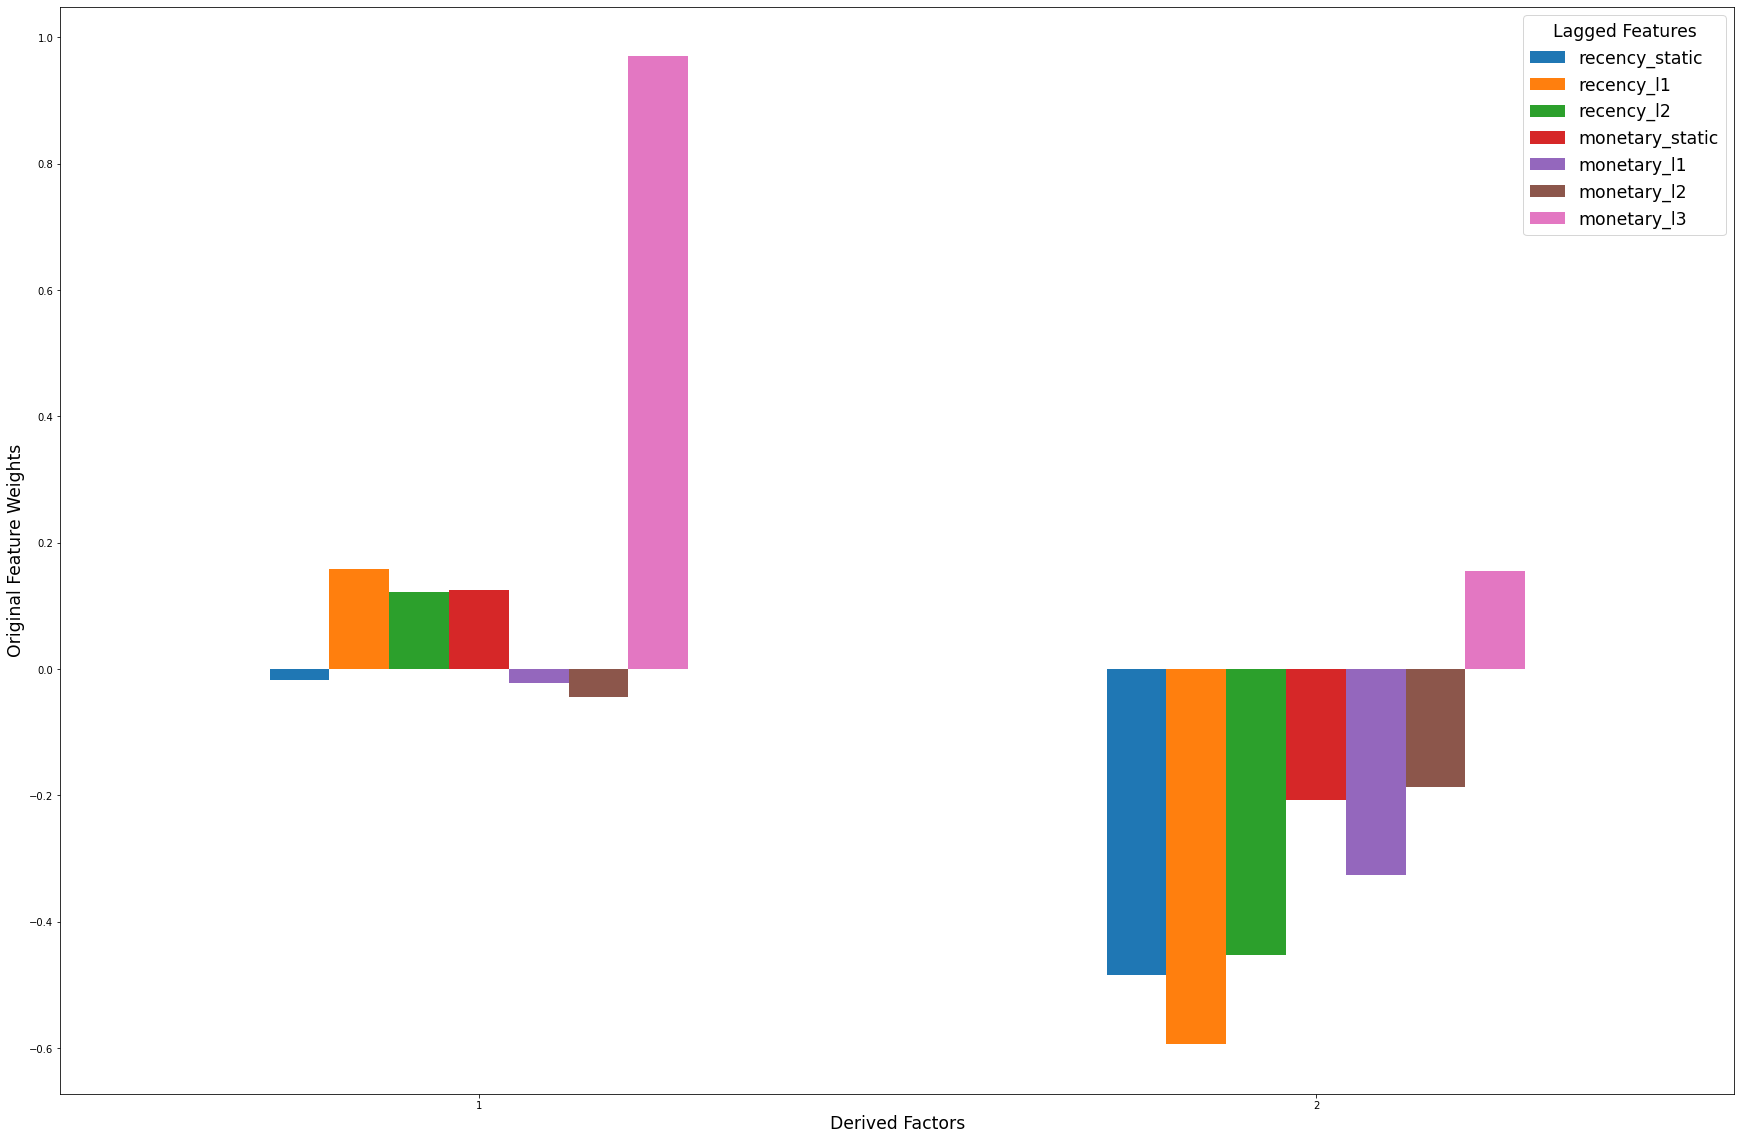

In [71]:
pca_reduced = PCA(n_components=2) # set dimensions to number of features to gain narrow sense of contribution
pca_reduced.fit(refined_scaled_RFM_lagged) # fit to existing data shape

# display via PCA results plot
def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pd.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (30,20))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights",fontsize='xx-large')
   ax.set_xlabel("Derived Factors",fontsize='xx-large')
   ax.set_xticklabels(dimensions, rotation=0)
   ax.legend(fontsize='xx-large',title='Lagged Features',title_fontsize='xx-large')

display_factors(pca_reduced, refined_scaled_RFM_lagged.columns)

In [72]:
print(refined_scaled_RFM_lagged.columns) # list features for reference
print(abs(pca_reduced.components_.round(decimals=2)))

Index(['recency_static', 'recency_l1', 'recency_l2', 'monetary_static',
       'monetary_l1', 'monetary_l2', 'monetary_l3'],
      dtype='object')
[[0.02 0.16 0.12 0.12 0.02 0.04 0.97]
 [0.48 0.59 0.45 0.21 0.33 0.19 0.16]]


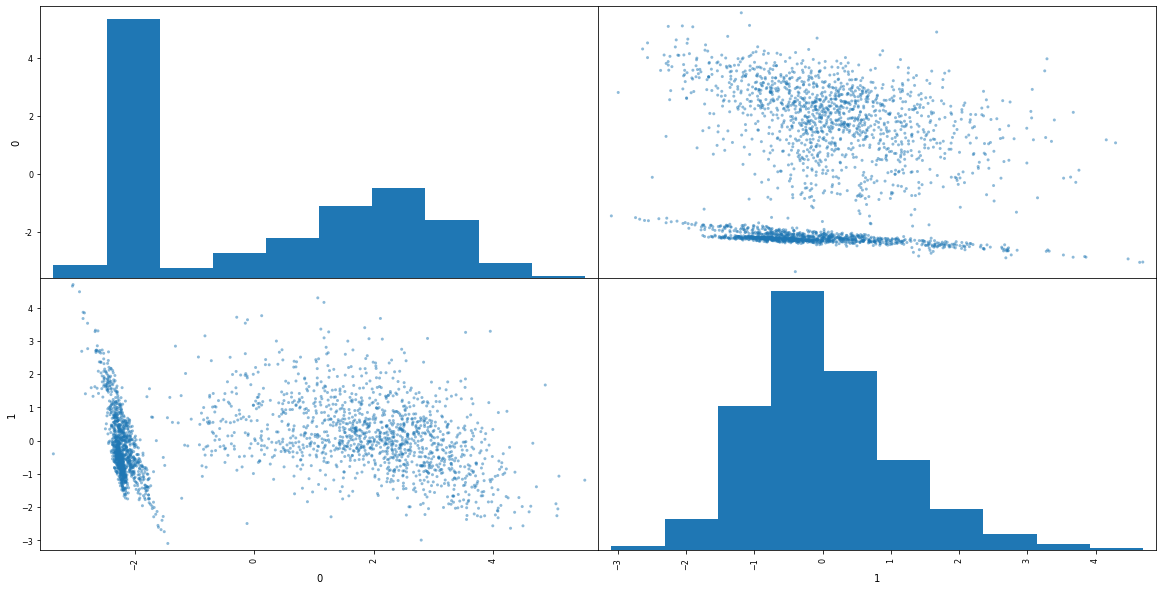

In [73]:
reduced_data = pca_reduced.transform(refined_scaled_RFM_lagged) # transform the reduced 'good' data to our fitted shape of x dimensions

reduced_data = pd.DataFrame(reduced_data) # create new data frame from fitted data
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

#### 5. k-Means Cluster modelling

Select best k value, utilising silhouette score as metric of optimised performance.

In [74]:
for i in range(2,10): # loop to run possible cluster numbers
  k = i
  clusterer = KMeans(n_clusters=k).fit(reduced_data) # k means clustering algorithm applied to reduced data
  preds = clusterer.predict(reduced_data) # predict cluster for each data point
  score = silhouette_score(reduced_data, preds, metric='euclidean') # find each cluster centre 
  print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score)) # average silhouette score calculated for each value of k within group

For n_clusters = 2. The average silhouette_score is : 0.6406233893800852)
For n_clusters = 3. The average silhouette_score is : 0.5238280409148026)
For n_clusters = 4. The average silhouette_score is : 0.46227842260659124)
For n_clusters = 5. The average silhouette_score is : 0.451645184313139)
For n_clusters = 6. The average silhouette_score is : 0.4651117615824178)
For n_clusters = 7. The average silhouette_score is : 0.4244523270838079)
For n_clusters = 8. The average silhouette_score is : 0.4191800769108369)
For n_clusters = 9. The average silhouette_score is : 0.40999833325391927)


- 2 selected as best k value to cluster

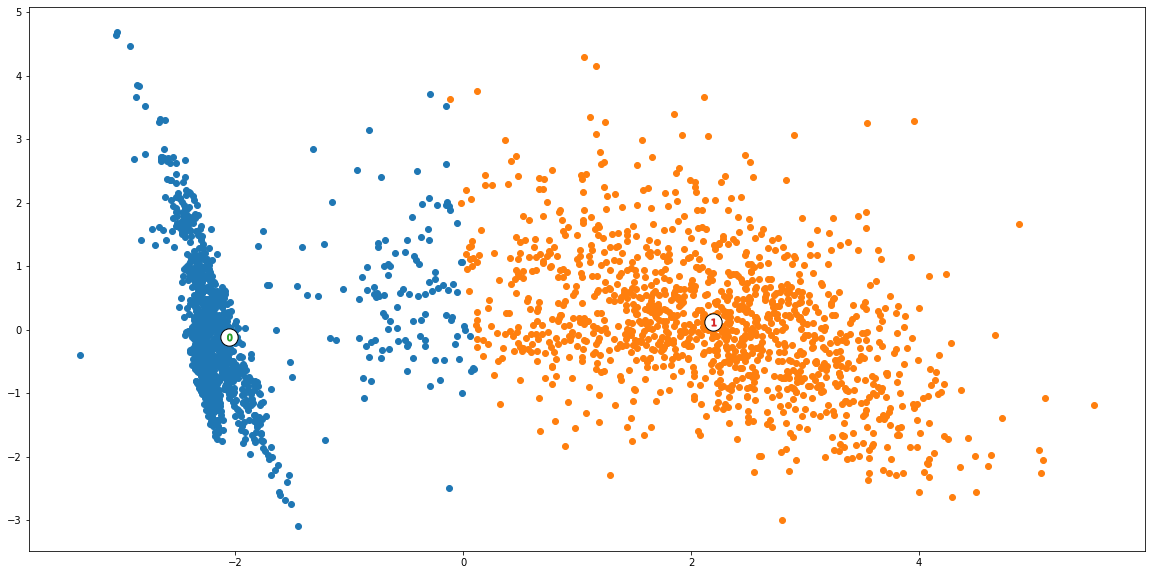

In [75]:
clusterer = KMeans(n_clusters=2).fit(reduced_data) # k of 2
preds = clusterer.predict(reduced_data) # predict 2 clusters
centres = clusterer.cluster_centers_ #  calculate 2 cluster centres

assignments = pd.DataFrame(preds, columns = ['Cluster']) # format cluster predictions into a data frame

plot_data = pd.concat([assignments, reduced_data], axis = 1) # concatenate 2 cluster predictions onto axis alongside data points

plt.rcParams['figure.figsize'] = (20,10) # format figure axis

# plot data points
for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
# plot cluster centres 
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

#### 6. Segment Archetypes

In [78]:
log_centres = pca_reduced.inverse_transform(centres) # inverse trasnform centres to reverse dimensionality reduction

true_centres = np.exp(log_centres) # exponentiate centres to reverse log scaling

# loop to display true centres of the 2 clusters (segment 0 can be treated as segment 1 etc. to bypass python default)
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame((true_centres), columns = refined_scaled_RFM_lagged.columns)
true_centres.index = segments

print(true_centres)

           recency_static  recency_l1  recency_l2  monetary_static  \
Segment 0        0.826156    0.895779    0.927585         1.914671   
Segment 1        0.687834    1.537505    1.410354         3.107979   

           monetary_l1  monetary_l2  monetary_l3  
Segment 0     0.686598     0.729664     1.182871  
Segment 1     0.579604     0.580236    75.726218  


#### 7. Assigning profiles

Statistical summaries of segments in reference to temporal RFM behaviour.

In [97]:
final_assignments = pd.concat([assignments, RFM_lagged], axis = 1) # assign original data to relevant segment

# summary statistics of each segment 
for c, d in final_assignments.groupby('Cluster'):  
    print("Segment", c+1) 
    display(d.describe())

Segment 1.0


,Cluster,recency_static,recency_l1,recency_l2,recency_l3,monetary_static,monetary_l1,monetary_l2,monetary_l3,frequency_static,frequency_l1,frequency_l2,frequency_l3
count,1288.0,1288.000000,1288.000000,1288.000000,1.288000e+03,1288.000000,1288.000000,1288.000000,1288.000000,1.288000e+03,1288.000000,1288.000000,1.288000e+03
mean,0.0,11138.918478,28490.235248,20960.012422,2.464782e+04,4563.859123,62.458975,46.627026,58.135559,3.984250e+08,28490.235248,20960.012422,2.464782e+04
std,0.0,24043.131286,71646.030682,52723.699289,6.335255e+04,5226.429252,108.812662,94.889329,110.592378,1.278030e+09,71646.030682,52723.699289,6.335255e+04
min,0.0,0.000000,0.000000,0.000000,0.000000e+00,8.570000,0.000000,0.000000,0.000000,1.600000e+01,0.000000,0.000000,0.000000e+00
25%,0.0,1170.000000,0.000000,0.000000,0.000000e+00,1315.872500,0.000000,0.000000,0.000000,3.558796e+06,0.000000,0.000000,0.000000e+00
50%,0.0,4145.000000,1766.500000,0.000000,1.202500e+03,2911.705000,14.005000,0.000000,7.700000,3.410821e+07,1766.500000,0.000000,1.202500e+03
75%,0.0,11740.500000,20787.000000,16465.000000,2.150225e+04,5901.212500,83.295000,59.885000,78.780000,2.289656e+08,20787.000000,16465.000000,2.150225e+04
max,0.0,322206.000000,799588.000000,565300.000000,1.087964e+06,61568.550000,1072.430000,1683.820000,1636.990000,1.866833e+10,799588.000000,565300.000000,1.087964e+06


Segment 2.0


,Cluster,recency_static,recency_l1,recency_l2,recency_l3,monetary_static,monetary_l1,monetary_l2,monetary_l3,frequency_static,frequency_l1,frequency_l2,frequency_l3
count,1212.0,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1.211000e+03,1211.000000,1211.000000,1211.000000
mean,1.0,10194.590421,26615.786127,20674.716763,21998.587118,4476.704855,61.007704,45.513105,54.437374,3.404332e+08,26615.786127,20674.716763,21998.587118
std,0.0,21610.227668,64188.530570,48163.003432,53284.920003,4698.912717,101.479034,81.135261,98.390713,1.010144e+09,64188.530570,48163.003432,53284.920003
min,1.0,0.000000,0.000000,0.000000,0.000000,19.580000,0.000000,0.000000,0.000000,2.500000e+01,0.000000,0.000000,0.000000
25%,1.0,1140.500000,0.000000,0.000000,0.000000,1367.830000,0.000000,0.000000,0.000000,3.817524e+06,0.000000,0.000000,0.000000
50%,1.0,4314.000000,1920.000000,252.000000,762.000000,3144.960000,13.570000,2.990000,5.980000,3.687069e+07,1920.000000,252.000000,762.000000
75%,1.0,10812.000000,24330.000000,17346.500000,17980.500000,5884.580000,86.740000,59.920000,74.130000,2.343834e+08,24330.000000,17346.500000,17980.500000
max,1.0,303510.000000,920584.000000,374796.000000,608153.000000,64736.050000,1026.260000,760.010000,1056.240000,1.562440e+10,920584.000000,374796.000000,608153.000000


Descriptive summaries of segments in reference to segment descriptions.

segment 1:
- high monetary l3, high recency l2, lower frequency l3 (return to PCA analysis and dominance of monetary l3 in component 1)
- frequency (50%) high very low mid
- monetary (50%) high low low
- recency (50%) high low mid

segment 2:
- frequency (50%) high low high
- monetary (50%) high very low mid
- recency (50%) high low high

In [105]:
final_judge = pd.concat([assignments, transaction_data], axis = 1) # assign original data to relevant segment
final_judge.groupby('Cluster').mean()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
Cluster,,,,,,,,,,,,
0.0,1210.970497,2.702356e+10,4.177019,2.094206e+06,1.246118,2.922842,3259.965062,-0.569829,1573.403727,1.255435,-0.007989,-0.001320
1.0,1225.948845,2.702272e+10,4.099835,2.090047e+06,1.264026,2.717483,3674.240099,-0.534637,1569.032178,1.239274,-0.008614,-0.002104
